## 인스타그램 크롤링
<br>

### 검색한 다음 페이지 넘기면서 가져옴

In [1]:
import re
import numpy as np
from bs4 import BeautifulSoup as bs
import pickle
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [141]:
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# font_path = 'Malgun Gothic.ttf'
# font_name = fm.FontProperties(fname=font_path, size=10).get_name()
# plt.rc('font', family=font_name, size=12)
# plt.rcParams["figure.figsize"] = (20, 10)
# register_matplotlib_converters()

mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='Malgun Gothic')


In [143]:
from wordcloud import WordCloud

In [173]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import re
import numpy as np
from bs4 import BeautifulSoup as bs

In [175]:
# import re
# import numpy as np
# from bs4 import BeautifulSoup as bs
# char = re.compile('[^a-z|^A-Z|^ㄱ-힣]')
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

insta_dict= pd.DataFrame(columns=['date', 'likes', 'hash_tag', 'img_url'])

browser = webdriver.Chrome('C:/Temp/chromedriver')
browser.get("https://www.instagram.com/")
img_link4=[]
clicks=browser.find_element_by_class_name('_9AhH0').click()
time.sleep(3)
n=1

while True:
    soup = bs(browser.page_source,'html.parser')
    video = soup.find('div', class_='PyenC')
    if video != None:
            browser.find_element_by_css_selector('body > div._2dDPU.CkGkG > div.EfHg9 > div > div > a._65Bje.coreSpriteRightPaginationArrow').click()
            soup = bs(browser.page_source,'html.parser')

    #시간
    try:
        obj = soup.find('div', class_='k_Q0X NnvRN')
        date1=obj.time['title']
    except:
        date1=''
       
    
    
    # 좋아요
    try:
        obj2 = soup.find('div',class_='Nm9Fw')
        like1=obj2.span.string
    except:
        like1='0'

    

    # 해시태그
    try:
        obj3 = soup.find_all('a',class_='xil3i')
        hash_tag1=""
        for ob in obj3:
            ob1 = ob.string
            hash_tag1 += ob1
            hash_tag1=emoji_pattern.sub(r'', hash_tag1)
#         print(hash_tag1)
    except:
        hash_tag1=''
    
    
    
    # 사진 가져오기
#     obj4 = soup.find('div',class_='_97aPb')
#     obj4 = soup.find('div',class_='pR7Pc)
    try:
        
        img_src=browser.find_element_by_css_selector('body > div._2dDPU.CkGkG > div.zZYga > div > article > div._97aPb > div > div.pR7Pc > div.Igw0E.IwRSH.eGOV_._4EzTm.O1flK.D8xaz.fm1AK.TxciK.yiMZG > div > div > div > ul > li:nth-child(2) > div > div > div > div.KL4Bh > img').get_attribute('src')
    #     img_src=obj4.img['src']
        img_link4.append(img_src)
    except:
        img_link4.append('')
#     with urlopen(img_src) as f:
#             # img라는 폴더 안에 programmer(n).jpg 파일을 저장한다.
#             # 텍스트 파일이 아니기 때문에 w(write)만 쓰면 안되고 binary 모드를 추가시켜야 한다.
#             with open('c:/Temp/test/' + str(n) + '.jpg', "wb") as h:
#                 # f를 읽고 img에 저장한다.
#                 img = f.read()
#                 # h에 위 내용을 쓴다.
#                 h.write(img)
#         # 계속 programmer 1에 덮어쓰지 않도록 1을 증가시켜 준다
#     n += 1 
    

    insta_dict=insta_dict.append({'date': date1,'likes':like1,"hash_tag": hash_tag1}, ignore_index=True)
    if len(insta_dict) == 1000:
        break
#     time.sleep(1)
    browser.find_element_by_css_selector('body > div._2dDPU.CkGkG > div.EfHg9 > div > div > a._65Bje.coreSpriteRightPaginationArrow').click()
    time.sleep(2)
        
insta_dict.to_csv('C:/Temp/test4/instagram_crawling4.txt', mode='w', encoding='utf-8')        
 
# instagram=pd.read_csv('C:/Temp/test/instagram_crawling3.txt')
# instagram


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"._9AhH0"}
  (Session info: chrome=86.0.4240.198)



### 데이터 수 확인

In [ ]:
instagram=pd.read_csv('C:/Temp/test4/instagram_crawling4.txt')
instagram
len(img_link4)


In [ ]:
# img_link1=img_link.copy()
# img_link1
count=0
for img in img_link4:
    if img == '':
        count+=1
print(count)

### 사진저장

In [ ]:
n=1
for img_src in img_link3:
    if img_src == '':
        continue
    else:
        with urlopen(img_src) as f:
            # img라는 폴더 안에 programmer(n).jpg 파일을 저장한다.
            # 텍스트 파일이 아니기 때문에 w(write)만 쓰면 안되고 binary 모드를 추가시켜야 한다.
            with open('c:/Temp/test3/' + str(n) + '.jpg', "wb") as h:
                # f를 읽고 img에 저장한다.
                img = f.read()
                # h에 위 내용을 쓴다.
                h.write(img)
        # 계속 programmer 1에 덮어쓰지 않도록 1을 증가시켜 준다
        n += 1 

### 사진 저장용 이미지 링크 리스트 pickle로 저장

In [ ]:
# import pickle

## img_link1
with open("c:/temp/test1/img_link1.pickle","wb") as fw:
    pickle.dump(img_link1, fw)
        

# img_link2
with open("c:/temp/test2/img_link2.pickle","wb") as fw:
    pickle.dump(img_link2, fw)
        

# img_link3
with open("c:/temp/test3/img_link3.pickle","wb") as fw:
    pickle.dump(img_link3, fw)
        


### pickle파일 불러오기

In [75]:
# import pickle

with open("c:/temp/test1/img_link1.pickle","rb") as fr:
    img_link1 = pickle.load(fr)
    
with open("c:/temp/test2/img_link2.pickle","rb") as fr:
    img_link2 = pickle.load(fr)

with open("c:/temp/test3/img_link3.pickle","rb") as fr:
    img_link3 = pickle.load(fr)

In [76]:
# len(img_link1)
# len(img_link2)
len(img_link3)

1000

In [77]:
instagram1=pd.read_csv('C:/Temp/test1/instagram_crawling1.txt')
instagram2=pd.read_csv('C:/Temp/test2/instagram_crawling2.txt')
instagram3=pd.read_csv('C:/Temp/test3/instagram_crawling3.txt')

In [78]:
instagram1['img_link']=img_link1
instagram2['img_link']=img_link2
instagram3['img_link']=img_link3

### img_link가 '' 인 행들 삭제

In [79]:
idx1=instagram1[instagram1['img_link']==''].index
instagram1.drop(idx1,inplace=True)

idx2=instagram2[instagram2['img_link']==''].index
instagram2.drop(idx2,inplace=True)

idx3=instagram3[instagram3['img_link']==''].index
instagram3.drop(idx3,inplace=True)

### img_url컬럼 삭제

In [80]:
instagram1.drop("img_url", axis=1, inplace=True)
instagram2.drop("img_url", axis=1, inplace=True)
instagram3.drop("img_url", axis=1, inplace=True)

In [81]:
instagram=pd.concat([instagram1,instagram2,instagram3])
instagram

,Unnamed: 0,date,likes,hash_tag,img_link
0,0,2020년 12월 3일,407,#2020fw_겨울도씨#덕다운패딩#패딩#패딩추천,https://scontent-ssn1-1.cdninstagram.com/v/t51...
1,1,2020년 12월 2일,"1,397",#98도씨메이드#2020fw_겨울도씨,https://scontent-ssn1-1.cdninstagram.com/v/t51...
2,2,2020년 12월 2일,810,#2020fw_겨울도씨#니트조끼#울슬랙스#트위드ᄌ...,https://scontent-ssn1-1.cdninstagram.com/v/t51...
3,3,2020년 12월 1일,694,#2020fw_겨울도씨#울자켓#기모셔츠#겨울데님#98도씨메이드,https://scontent-ssn1-1.cdninstagram.com/v/t51...
4,4,2020년 12월 1일,"1,753",#98도씨메이드#1만원대#2020fw_겨울도씨#기모팬츠#트레이닝팬츠,https://scontent-ssn1-1.cdninstagram.com/v/t51...
...,...,...,...,...,...
994,994,2019년 10월 12일,163,#에드모어_daily#에드모어_ootd#핸드메이드코트,https://scontent-ssn1-1.cdninstagram.com/v/t51...
995,995,2019년 10월 12일,114,#addmorenew#에드모어_daily#에드모어_ootd#니트#브이넥니트#부드러운니트,https://scontent-ssn1-1.cdninstagram.com/v/t51...
996,996,2019년 10월 12일,92,#에드모어_daily#에드모어_ootd,https://scontent-ssn1-1.cdninstagram.com/v/t51...
998,998,2019년 10월 11일,137,#니쥬벨트가디건#아더부츠컷레깅스#에드모어_daily#에드모어_ootd#카라가디건#스...,https://scontent-ssn1-1.cdninstagram.com/v/t51...


In [83]:
instagram=instagram.dropna(axis=0)
len(instagram)

1386

### 계절요인 분석을 위해 월 컬럼 생성

In [84]:
import re
instagram['month']=[i[6:8] for i in instagram.date]
# instagram['month']=[i[6:8] for i in instagram.date]
aa=[]
for x in instagram['month']:
    rep=re.sub('월','',x)
    aa.append(rep)

instagram['month']=aa
instagram['month'].unique()

array(['12', '11', '10', '9', '8', '7', '6', '5', '4', '3', '2', '1'],
      dtype=object)

In [85]:
instagram['month']=instagram['month'].astype(int)

In [86]:
instagram.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1386 non-null   int64 
 1   date        1386 non-null   object
 2   likes       1386 non-null   object
 3   hash_tag    1386 non-null   object
 4   img_link    1386 non-null   object
 5   month       1386 non-null   int32 
dtypes: int32(1), int64(1), object(4)
memory usage: 70.4+ KB


In [87]:
season=[]
for x in instagram['month']:
    if 3 <= x <= 5:
        season.append('봄')
    elif 6<= x <= 8:
        season.append('여름')
    elif 9 <= x <= 11:
        season.append('가을')
    else:
        season.append('겨울')
        
instagram['season']=season
instagram

,Unnamed: 0,date,likes,hash_tag,img_link,month,season
0,0,2020년 12월 3일,407,#2020fw_겨울도씨#덕다운패딩#패딩#패딩추천,https://scontent-ssn1-1.cdninstagram.com/v/t51...,12,겨울
1,1,2020년 12월 2일,"1,397",#98도씨메이드#2020fw_겨울도씨,https://scontent-ssn1-1.cdninstagram.com/v/t51...,12,겨울
2,2,2020년 12월 2일,810,#2020fw_겨울도씨#니트조끼#울슬랙스#트위드ᄌ...,https://scontent-ssn1-1.cdninstagram.com/v/t51...,12,겨울
3,3,2020년 12월 1일,694,#2020fw_겨울도씨#울자켓#기모셔츠#겨울데님#98도씨메이드,https://scontent-ssn1-1.cdninstagram.com/v/t51...,12,겨울
4,4,2020년 12월 1일,"1,753",#98도씨메이드#1만원대#2020fw_겨울도씨#기모팬츠#트레이닝팬츠,https://scontent-ssn1-1.cdninstagram.com/v/t51...,12,겨울
...,...,...,...,...,...,...,...
994,994,2019년 10월 12일,163,#에드모어_daily#에드모어_ootd#핸드메이드코트,https://scontent-ssn1-1.cdninstagram.com/v/t51...,10,가을
995,995,2019년 10월 12일,114,#addmorenew#에드모어_daily#에드모어_ootd#니트#브이넥니트#부드러운니트,https://scontent-ssn1-1.cdninstagram.com/v/t51...,10,가을
996,996,2019년 10월 12일,92,#에드모어_daily#에드모어_ootd,https://scontent-ssn1-1.cdninstagram.com/v/t51...,10,가을
998,998,2019년 10월 11일,137,#니쥬벨트가디건#아더부츠컷레깅스#에드모어_daily#에드모어_ootd#카라가디건#스...,https://scontent-ssn1-1.cdninstagram.com/v/t51...,10,가을


In [88]:
split_tag=[]
for x in instagram['hash_tag']:
    rep=re.sub('#',' ',x)
    split_tag.append(rep)
    
instagram['hash_tag']=split_tag
instagram

,Unnamed: 0,date,likes,hash_tag,img_link,month,season
0,0,2020년 12월 3일,407,2020fw_겨울도씨 덕다운패딩 패딩 패딩추천,https://scontent-ssn1-1.cdninstagram.com/v/t51...,12,겨울
1,1,2020년 12월 2일,"1,397",98도씨메이드 2020fw_겨울도씨,https://scontent-ssn1-1.cdninstagram.com/v/t51...,12,겨울
2,2,2020년 12월 2일,810,2020fw_겨울도씨 니트조끼 울슬랙스 트위드ᄌ...,https://scontent-ssn1-1.cdninstagram.com/v/t51...,12,겨울
3,3,2020년 12월 1일,694,2020fw_겨울도씨 울자켓 기모셔츠 겨울데님 98도씨메이드,https://scontent-ssn1-1.cdninstagram.com/v/t51...,12,겨울
4,4,2020년 12월 1일,"1,753",98도씨메이드 1만원대 2020fw_겨울도씨 기모팬츠 트레이닝팬츠,https://scontent-ssn1-1.cdninstagram.com/v/t51...,12,겨울
...,...,...,...,...,...,...,...
994,994,2019년 10월 12일,163,에드모어_daily 에드모어_ootd 핸드메이드코트,https://scontent-ssn1-1.cdninstagram.com/v/t51...,10,가을
995,995,2019년 10월 12일,114,addmorenew 에드모어_daily 에드모어_ootd 니트 브이넥니트 부드러운니트,https://scontent-ssn1-1.cdninstagram.com/v/t51...,10,가을
996,996,2019년 10월 12일,92,에드모어_daily 에드모어_ootd,https://scontent-ssn1-1.cdninstagram.com/v/t51...,10,가을
998,998,2019년 10월 11일,137,니쥬벨트가디건 아더부츠컷레깅스 에드모어_daily 에드모어_ootd 카라가디건 스...,https://scontent-ssn1-1.cdninstagram.com/v/t51...,10,가을


## 자연어처리

In [15]:
import nltk 

In [89]:
from konlpy.tag import Okt                                  ## 다른 형태소를 클래스를 가져온다. 

t = Okt()
wc=[]
for x in instagram['hash_tag']:
    tokens_ko = t.nouns(x)                ## 텍스트에서 명사를 추출한다. 
    wc.append(tokens_ko)
    
# wc

In [90]:
instagram['tag_list']=wc
instagram

,Unnamed: 0,date,likes,hash_tag,img_link,month,season,tag_list
0,0,2020년 12월 3일,407,2020fw_겨울도씨 덕다운패딩 패딩 패딩추천,https://scontent-ssn1-1.cdninstagram.com/v/t51...,12,겨울,"[겨울, 도씨, 덕, 다운, 패딩, 패딩, 패딩, 추천]"
1,1,2020년 12월 2일,"1,397",98도씨메이드 2020fw_겨울도씨,https://scontent-ssn1-1.cdninstagram.com/v/t51...,12,겨울,"[도씨, 메이드, 겨울, 도씨]"
2,2,2020년 12월 2일,810,2020fw_겨울도씨 니트조끼 울슬랙스 트위드ᄌ...,https://scontent-ssn1-1.cdninstagram.com/v/t51...,12,겨울,[]
3,3,2020년 12월 1일,694,2020fw_겨울도씨 울자켓 기모셔츠 겨울데님 98도씨메이드,https://scontent-ssn1-1.cdninstagram.com/v/t51...,12,겨울,"[겨울, 도씨, 자켓, 셔츠, 겨울, 데님, 도씨, 메이드]"
4,4,2020년 12월 1일,"1,753",98도씨메이드 1만원대 2020fw_겨울도씨 기모팬츠 트레이닝팬츠,https://scontent-ssn1-1.cdninstagram.com/v/t51...,12,겨울,"[도씨, 메이드, 겨울, 도씨, 팬츠, 트레이닝, 팬츠]"
...,...,...,...,...,...,...,...,...
994,994,2019년 10월 12일,163,에드모어_daily 에드모어_ootd 핸드메이드코트,https://scontent-ssn1-1.cdninstagram.com/v/t51...,10,가을,"[에드, 모어, 에드, 모어, 핸드, 메이드, 코트]"
995,995,2019년 10월 12일,114,addmorenew 에드모어_daily 에드모어_ootd 니트 브이넥니트 부드러운니트,https://scontent-ssn1-1.cdninstagram.com/v/t51...,10,가을,"[에드, 모어, 에드, 모어, 니트, 브이, 넥, 니트, 니트]"
996,996,2019년 10월 12일,92,에드모어_daily 에드모어_ootd,https://scontent-ssn1-1.cdninstagram.com/v/t51...,10,가을,"[에드, 모어, 에드, 모어]"
998,998,2019년 10월 11일,137,니쥬벨트가디건 아더부츠컷레깅스 에드모어_daily 에드모어_ootd 카라가디건 스...,https://scontent-ssn1-1.cdninstagram.com/v/t51...,10,가을,"[쥬, 벨트, 가디건, 아더, 부츠, 컷, 레깅스, 에드, 모어, 에드, 모어, 카..."


In [92]:
instagram.to_csv('C:/Temp/instagram.csv',index=False) 

In [93]:
instagram=pd.read_csv('C:/Temp/instagram.csv')
instagram

,Unnamed: 0,date,likes,hash_tag,img_link,month,season,tag_list
0,0,2020년 12월 3일,407,2020fw_겨울도씨 덕다운패딩 패딩 패딩추천,https://scontent-ssn1-1.cdninstagram.com/v/t51...,12,겨울,"['겨울', '도씨', '덕', '다운', '패딩', '패딩', '패딩', '추천']"
1,1,2020년 12월 2일,"1,397",98도씨메이드 2020fw_겨울도씨,https://scontent-ssn1-1.cdninstagram.com/v/t51...,12,겨울,"['도씨', '메이드', '겨울', '도씨']"
2,2,2020년 12월 2일,810,2020fw_겨울도씨 니트조끼 울슬랙스 트위드ᄌ...,https://scontent-ssn1-1.cdninstagram.com/v/t51...,12,겨울,[]
3,3,2020년 12월 1일,694,2020fw_겨울도씨 울자켓 기모셔츠 겨울데님 98도씨메이드,https://scontent-ssn1-1.cdninstagram.com/v/t51...,12,겨울,"['겨울', '도씨', '자켓', '셔츠', '겨울', '데님', '도씨', '메이드']"
4,4,2020년 12월 1일,"1,753",98도씨메이드 1만원대 2020fw_겨울도씨 기모팬츠 트레이닝팬츠,https://scontent-ssn1-1.cdninstagram.com/v/t51...,12,겨울,"['도씨', '메이드', '겨울', '도씨', '팬츠', '트레이닝', '팬츠']"
...,...,...,...,...,...,...,...,...
1381,994,2019년 10월 12일,163,에드모어_daily 에드모어_ootd 핸드메이드코트,https://scontent-ssn1-1.cdninstagram.com/v/t51...,10,가을,"['에드', '모어', '에드', '모어', '핸드', '메이드', '코트']"
1382,995,2019년 10월 12일,114,addmorenew 에드모어_daily 에드모어_ootd 니트 브이넥니트 부드러운니트,https://scontent-ssn1-1.cdninstagram.com/v/t51...,10,가을,"['에드', '모어', '에드', '모어', '니트', '브이', '넥', '니트'..."
1383,996,2019년 10월 12일,92,에드모어_daily 에드모어_ootd,https://scontent-ssn1-1.cdninstagram.com/v/t51...,10,가을,"['에드', '모어', '에드', '모어']"
1384,998,2019년 10월 11일,137,니쥬벨트가디건 아더부츠컷레깅스 에드모어_daily 에드모어_ootd 카라가디건 스...,https://scontent-ssn1-1.cdninstagram.com/v/t51...,10,가을,"['쥬', '벨트', '가디건', '아더', '부츠', '컷', '레깅스', '에드..."


In [64]:
tlist=['겨울', '도씨', '자켓', '셔츠', '겨울', '데님', '도씨', '메이드','세미정장']

category_list=['탑','후드','집업','니트','뷔스티에','블라우스','셔츠','가디건','티셔츠','원피스','정장','레깅스','스커트','치마','점프수트',
'청바지','기모바지','팬츠','핀턱스','베스트','자켓','재킷','패딩','점퍼','코트','백팩','숄더백','크로스백','클러치','토트','파우치','힙색','로퍼','스트랩힐','구두','부츠',
'샌들','스니커즈','슬립온','벨트','트레이닝']

# dd=[]
# ee=[]

# for i in instagram['tag_list'][0:3]:
#     for j in i:
#         for k in category_list:
#             if j.find(k) != -1:
#                 dd.append(j)
#     ee.append(dd)
        

    




In [110]:
ee=[]
def extract_list(x):
    x=pd.eval(x)
    ee.append([value1 for value1 in x for item in category_list if value1.find(item) != -1])

In [111]:
instagram['tag_list'].apply(extract_list)

0       None
1       None
2       None
3       None
4       None
        ... 
1381    None
1382    None
1383    None
1384    None
1385    None
Name: tag_list, Length: 1386, dtype: object

In [113]:
instagram['tag']=ee

In [117]:
ff=[]
for x in instagram['tag']:
    toset=set(x)
    tolist=list(toset)
    ff.append(tolist)


In [119]:
instagram['tag']=ff
instagram

,Unnamed: 0,date,likes,hash_tag,img_link,month,season,tag_list,tag
0,0,2020년 12월 3일,407,2020fw_겨울도씨 덕다운패딩 패딩 패딩추천,https://scontent-ssn1-1.cdninstagram.com/v/t51...,12,겨울,"['겨울', '도씨', '덕', '다운', '패딩', '패딩', '패딩', '추천']",[패딩]
1,1,2020년 12월 2일,"1,397",98도씨메이드 2020fw_겨울도씨,https://scontent-ssn1-1.cdninstagram.com/v/t51...,12,겨울,"['도씨', '메이드', '겨울', '도씨']",[]
2,2,2020년 12월 2일,810,2020fw_겨울도씨 니트조끼 울슬랙스 트위드ᄌ...,https://scontent-ssn1-1.cdninstagram.com/v/t51...,12,겨울,[],[]
3,3,2020년 12월 1일,694,2020fw_겨울도씨 울자켓 기모셔츠 겨울데님 98도씨메이드,https://scontent-ssn1-1.cdninstagram.com/v/t51...,12,겨울,"['겨울', '도씨', '자켓', '셔츠', '겨울', '데님', '도씨', '메이드']","[셔츠, 자켓]"
4,4,2020년 12월 1일,"1,753",98도씨메이드 1만원대 2020fw_겨울도씨 기모팬츠 트레이닝팬츠,https://scontent-ssn1-1.cdninstagram.com/v/t51...,12,겨울,"['도씨', '메이드', '겨울', '도씨', '팬츠', '트레이닝', '팬츠']","[트레이닝, 팬츠]"
...,...,...,...,...,...,...,...,...,...
1381,994,2019년 10월 12일,163,에드모어_daily 에드모어_ootd 핸드메이드코트,https://scontent-ssn1-1.cdninstagram.com/v/t51...,10,가을,"['에드', '모어', '에드', '모어', '핸드', '메이드', '코트']",[코트]
1382,995,2019년 10월 12일,114,addmorenew 에드모어_daily 에드모어_ootd 니트 브이넥니트 부드러운니트,https://scontent-ssn1-1.cdninstagram.com/v/t51...,10,가을,"['에드', '모어', '에드', '모어', '니트', '브이', '넥', '니트'...",[니트]
1383,996,2019년 10월 12일,92,에드모어_daily 에드모어_ootd,https://scontent-ssn1-1.cdninstagram.com/v/t51...,10,가을,"['에드', '모어', '에드', '모어']",[]
1384,998,2019년 10월 11일,137,니쥬벨트가디건 아더부츠컷레깅스 에드모어_daily 에드모어_ootd 카라가디건 스...,https://scontent-ssn1-1.cdninstagram.com/v/t51...,10,가을,"['쥬', '벨트', '가디건', '아더', '부츠', '컷', '레깅스', '에드...","[팬츠, 가디건, 벨트, 부츠, 레깅스]"


In [122]:
instagram.groupby('season').size()

season
가을    624
겨울    177
봄     195
여름    390
dtype: int64

In [125]:
instagram.rename(columns={'Unnamed: 0':'id'},inplace=True)

In [128]:
instagram=instagram.reset_index()


In [130]:
instagram

0

In [151]:
# 플레이리스트 아이디(id)와 수록곡(songs) 추출
insta_tag = instagram[['index', 'tag']]

# unnest songs
insta_tag_unnest = np.dstack(
    (
        np.repeat(insta_tag.index.values, list(map(len, insta_tag.tag))), 
        np.concatenate(insta_tag.tag.values)
    )
)

# unnested 데이터프레임 생성 : plylst_song_map
insta_tag = pd.DataFrame(data = insta_tag_unnest[0], columns = insta_tag.columns)
insta_tag['index'] = insta_tag['index'].astype(str)
insta_tag['tag'] = insta_tag['tag'].astype(str)

# unnest 객체 제거
del insta_tag_unnest

In [154]:
instagram['index'] = instagram['index'].astype(str)
insta=pd.merge(insta_tag,instagram,how='left',on='index')
insta

,index,tag_x,id,date,likes,hash_tag,img_link,month,season,tag_list,tag_y
0,0,패딩,0,2020년 12월 3일,407,2020fw_겨울도씨 덕다운패딩 패딩 패딩추천,https://scontent-ssn1-1.cdninstagram.com/v/t51...,12,겨울,"['겨울', '도씨', '덕', '다운', '패딩', '패딩', '패딩', '추천']",[패딩]
1,3,셔츠,3,2020년 12월 1일,694,2020fw_겨울도씨 울자켓 기모셔츠 겨울데님 98도씨메이드,https://scontent-ssn1-1.cdninstagram.com/v/t51...,12,겨울,"['겨울', '도씨', '자켓', '셔츠', '겨울', '데님', '도씨', '메이드']","[셔츠, 자켓]"
2,3,자켓,3,2020년 12월 1일,694,2020fw_겨울도씨 울자켓 기모셔츠 겨울데님 98도씨메이드,https://scontent-ssn1-1.cdninstagram.com/v/t51...,12,겨울,"['겨울', '도씨', '자켓', '셔츠', '겨울', '데님', '도씨', '메이드']","[셔츠, 자켓]"
3,4,트레이닝,4,2020년 12월 1일,"1,753",98도씨메이드 1만원대 2020fw_겨울도씨 기모팬츠 트레이닝팬츠,https://scontent-ssn1-1.cdninstagram.com/v/t51...,12,겨울,"['도씨', '메이드', '겨울', '도씨', '팬츠', '트레이닝', '팬츠']","[트레이닝, 팬츠]"
4,4,팬츠,4,2020년 12월 1일,"1,753",98도씨메이드 1만원대 2020fw_겨울도씨 기모팬츠 트레이닝팬츠,https://scontent-ssn1-1.cdninstagram.com/v/t51...,12,겨울,"['도씨', '메이드', '겨울', '도씨', '팬츠', '트레이닝', '팬츠']","[트레이닝, 팬츠]"
...,...,...,...,...,...,...,...,...,...,...,...
1287,1384,가디건,998,2019년 10월 11일,137,니쥬벨트가디건 아더부츠컷레깅스 에드모어_daily 에드모어_ootd 카라가디건 스...,https://scontent-ssn1-1.cdninstagram.com/v/t51...,10,가을,"['쥬', '벨트', '가디건', '아더', '부츠', '컷', '레깅스', '에드...","[팬츠, 가디건, 벨트, 부츠, 레깅스]"
1288,1384,벨트,998,2019년 10월 11일,137,니쥬벨트가디건 아더부츠컷레깅스 에드모어_daily 에드모어_ootd 카라가디건 스...,https://scontent-ssn1-1.cdninstagram.com/v/t51...,10,가을,"['쥬', '벨트', '가디건', '아더', '부츠', '컷', '레깅스', '에드...","[팬츠, 가디건, 벨트, 부츠, 레깅스]"
1289,1384,부츠,998,2019년 10월 11일,137,니쥬벨트가디건 아더부츠컷레깅스 에드모어_daily 에드모어_ootd 카라가디건 스...,https://scontent-ssn1-1.cdninstagram.com/v/t51...,10,가을,"['쥬', '벨트', '가디건', '아더', '부츠', '컷', '레깅스', '에드...","[팬츠, 가디건, 벨트, 부츠, 레깅스]"
1290,1384,레깅스,998,2019년 10월 11일,137,니쥬벨트가디건 아더부츠컷레깅스 에드모어_daily 에드모어_ootd 카라가디건 스...,https://scontent-ssn1-1.cdninstagram.com/v/t51...,10,가을,"['쥬', '벨트', '가디건', '아더', '부츠', '컷', '레깅스', '에드...","[팬츠, 가디건, 벨트, 부츠, 레깅스]"


In [155]:
winter=insta[insta['season']=='겨울']
fall=insta[insta['season']=='가을']
summer=insta[insta['season']=='여름']
spring=insta[insta['season']=='봄']

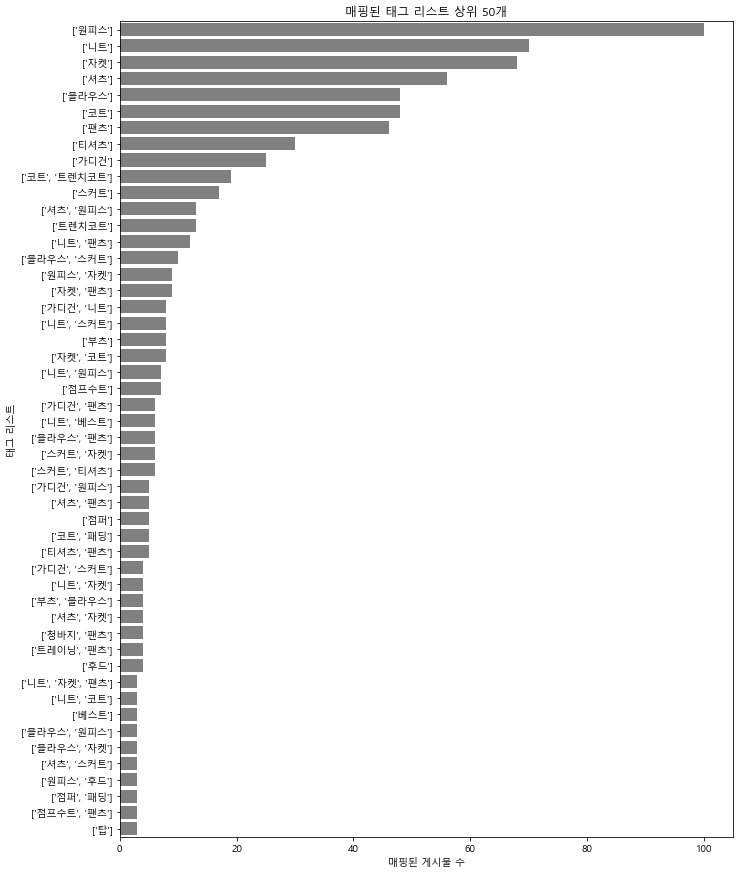

In [148]:
# 1. unnest 데이터프레임인 plylst_tag_map 테이블에서 태그 이름 정렬 후 list로 묶기
insta_tag_sort = insta_tag.sort_values(by = ['index', 'tag']).groupby('index').tag.apply(list).reset_index(name = 'tag_list')

# 2. 집계를 위해 1번 테이블에서 list 타입을 문자열 타입으로 변경
insta_tag_sort['tag_list'] = insta_tag_sort['tag_list'].astype(str)

# 3. 태그 리스트 별 매핑되는 플레이리스트 수 집계 테이블 생성 : tag_list_plylst_cnt
insta_tag_cnt = insta_tag_sort.groupby('tag_list').index.nunique().reset_index(name = 'tag_cnt')

# 4. 매핑 수 기준 상위 50개 필터링
insta_tag_cnt = insta_tag_cnt.nlargest(50, 'tag_cnt')

# 5. plotting
plt.figure(figsize = (11, 15))
insta_tag_cnt_plot = sns.barplot(y = 'tag_list', x = 'tag_cnt', data = insta_tag_cnt, color = 'grey')
insta_tag_cnt_plot.set_title('매핑된 태그 리스트 상위 50개')
insta_tag_cnt_plot.set_xlabel('매핑된 게시물 수')
insta_tag_cnt_plot.set_ylabel('태그 리스트')
plt.show()

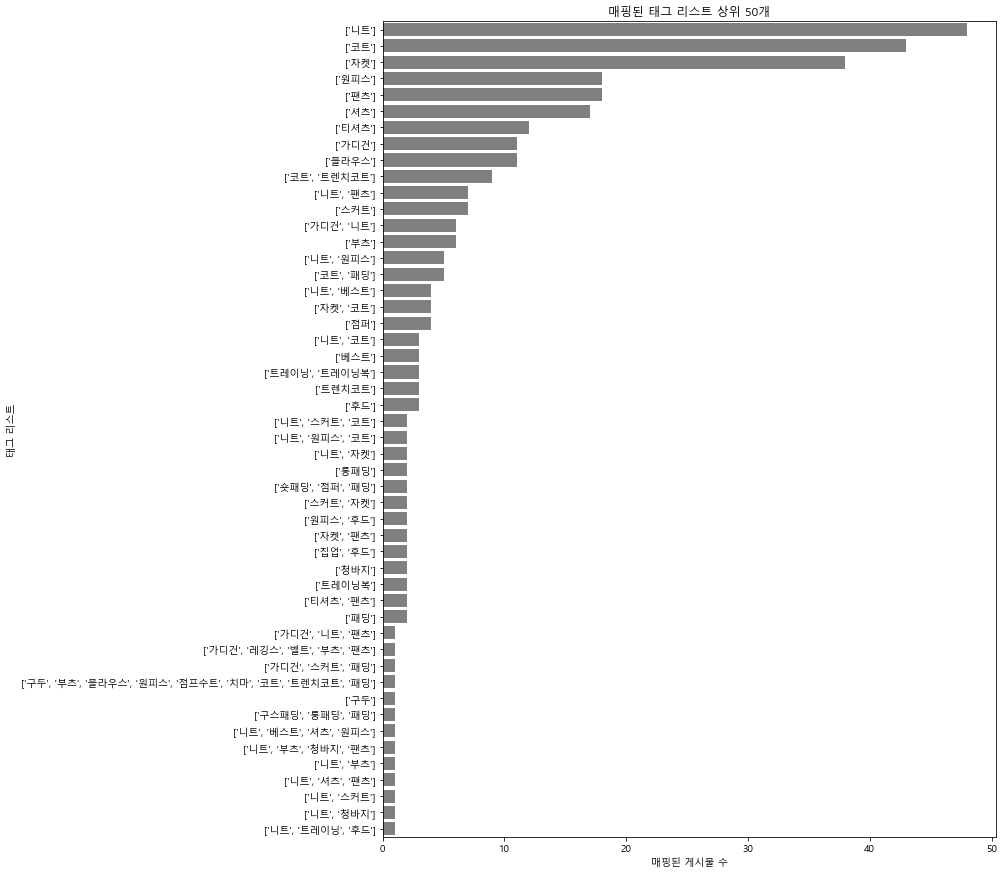

In [171]:
# 1. unnest 데이터프레임인 plylst_tag_map 테이블에서 태그 이름 정렬 후 list로 묶기
fall_sort = fall.sort_values(by = ['index', 'tag_x']).groupby('index').tag_x.apply(list).reset_index(name = 'fall_tag_list')

# 2. 집계를 위해 1번 테이블에서 list 타입을 문자열 타입으로 변경
fall_sort['fall_tag_list'] = fall_sort['fall_tag_list'].astype(str)

# 3. 태그 리스트 별 매핑되는 플레이리스트 수 집계 테이블 생성 : tag_list_plylst_cnt
fall_tag_cnt = fall_sort.groupby('fall_tag_list').index.nunique().reset_index(name = 'fall_tag_cnt')

# 4. 매핑 수 기준 상위 50개 필터링
fall_tag_cnt = fall_tag_cnt.nlargest(50, 'fall_tag_cnt')
fall_tag_cnt

# 5. plotting
plt.figure(figsize = (11, 15))
fall_tag_cnt_plot = sns.barplot(y = 'fall_tag_list', x = 'fall_tag_cnt', data = fall_tag_cnt, color = 'grey')
fall_tag_cnt_plot.set_title('매핑된 태그 리스트 상위 50개')
fall_tag_cnt_plot.set_xlabel('매핑된 게시물 수')
fall_tag_cnt_plot.set_ylabel('태그 리스트')
plt.show()

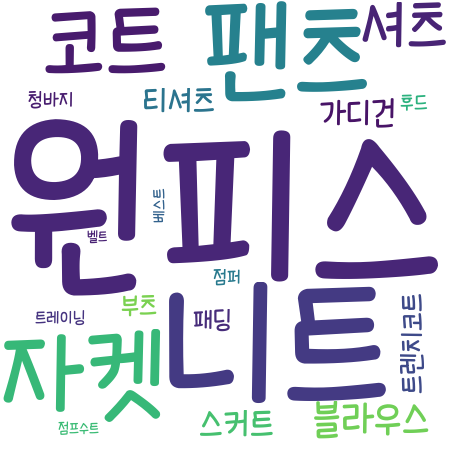

In [147]:
myfontpath = "c:/PyStexam/data/THEdog.ttf" 
tag_cnt = insta_tag.groupby('tag').tag.count().reset_index(name = 'mapping_cnt')
tag_cnt['tag'] = tag_cnt['tag'].astype(str)
tag_cnt['mapping_cnt'] = tag_cnt['mapping_cnt'].astype(int)

# 빈도 수가 10회 이상인 태그만 저장
tag_cnt = tag_cnt[tag_cnt['mapping_cnt'] >= 10]
word_count = list(zip(tag_cnt['tag'], tag_cnt['mapping_cnt']))

# plotting
wc = WordCloud(font_path=myfontpath,background_color = 'white', max_words = 100, width = 450, height = 450)
wc.generate_from_frequencies(dict(word_count)).to_image()

In [157]:
winter.tag_x.value_counts()

자켓       34
니트       26
팬츠       25
코트       24
셔츠       21
가디건      16
원피스      15
스커트      14
블라우스     13
트렌치코트    11
티셔츠       9
부츠        7
패딩        5
점퍼        4
청바지       4
숏패딩       2
니트웨어      2
롱패딩       1
구두        1
클러치       1
웰론숏패딩     1
넥패딩       1
벨트        1
숄더백       1
퍼패딩       1
패딩내피      1
후드        1
트레이닝      1
Name: tag_x, dtype: int64

In [162]:
fall.tag_x.value_counts()

니트       89
코트       78
자켓       53
팬츠       41
원피스      33
패딩       27
셔츠       21
가디건      20
부츠       16
티셔츠      16
스커트      16
트렌치코트    15
후드       14
점퍼       13
블라우스     13
베스트      11
롱패딩       8
청바지       7
트레이닝      7
트레이닝복     6
벨트        6
숏패딩       5
집업        4
패딩코디      3
구두        2
탑         1
웰론패딩      1
퍼후드패딩     1
블로퍼뮬      1
퍼롱패딩      1
치마        1
점프수트      1
레깅스       1
니트웨어      1
숄더백       1
퍼패딩       1
구스패딩      1
털패딩       1
퍼카라패딩     1
퀄팅패딩      1
Name: tag_x, dtype: int64

In [163]:
summer.tag_x.value_counts()

원피스      61
팬츠       39
블라우스     37
셔츠       25
니트       19
티셔츠      17
자켓       14
스커트      14
트렌치코트    11
가디건      11
점프수트      8
부츠        5
청바지       3
트레이닝      2
코트        2
후드        2
숄더백       1
벨트        1
베스트       1
샌들        1
Name: tag_x, dtype: int64

In [164]:
spring.tag_x.value_counts()

원피스      43
자켓       33
팬츠       30
셔츠       24
블라우스     21
스커트      19
티셔츠      11
가디건      10
니트       10
부츠        8
청바지       5
트레이닝      4
점프수트      3
후드        3
탑         2
코트        2
벨트        2
트렌치코트     2
레깅스       1
베스트       1
치마        1
샌들        1
Name: tag_x, dtype: int64